Задание 1: Написать свой скрипт, который переводит изображение из формата BGR в RGB (аналог библиотечной функции cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)). Для проверки используйте изображение starry_night.jpg

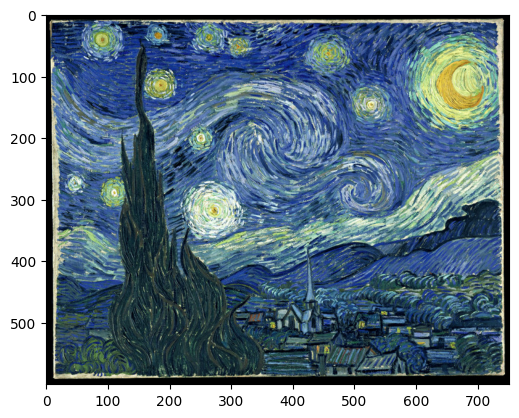

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_bgr = cv.imread("starry_night.jpg")

img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)

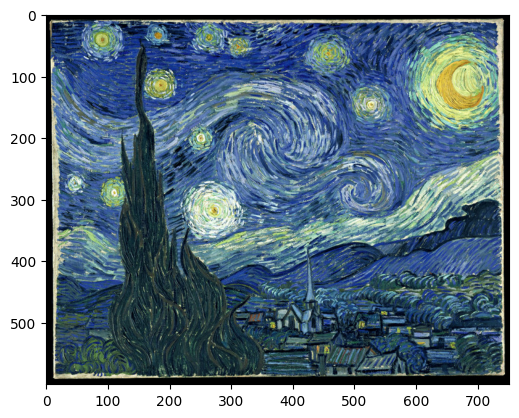

In [3]:
from PIL import Image

def convert_bgr_to_rgb(img_location):
  img_bgr = cv.imread(img_location)
  img_rgb = img_bgr.copy()
  img_rgb[:, :, 0] = img_bgr[:, :, 2]
  img_rgb[:, :, 2] = img_bgr[:, :, 0]
  return img_rgb

plt.imshow(convert_bgr_to_rgb("starry_night.jpg"))

Задание 2: Написать скрипт, который меняет местами луну и голубую воронку (в самом центре) на изображении starry_night.jpg.

In [4]:
# вырезаем объекты
center_img = img_rgb[110:300, 265:475, :]
moon = img_rgb[20:210, 580:720, :]

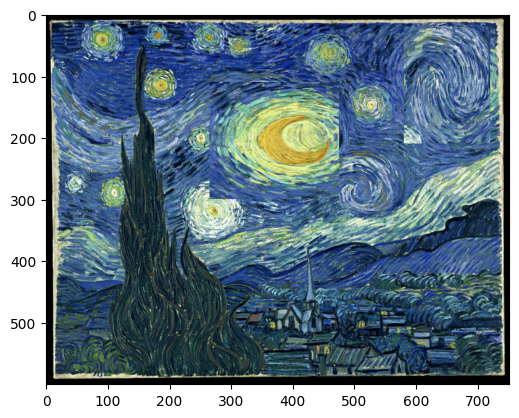

In [5]:
# меняем местами
center_img=cv.resize(center_img,(140,190))
moon = cv.resize(moon,(210,190))

img_rgb[110:300, 265:475, :] = moon
img_rgb[20:210, 580:720, :] = center_img

plt.imshow(img_rgb)

Задание 3: Попробуйте превратить "starry_night" в "starry_day" путем увеличения яркости изображения и смены темно-синих тонов на светло-желтые. Как это сделать? См. подсказку по смешиванию RGB цветов в файле color_blending.gif. Замечание: при проведении экспериментов с матрицами каналов, обратите внимание на dtype этих матриц (стандартный тип uint8 не позволит вам выйти за границы диапазона 0 .. 255, и поэтому может быть причиной появления не тех результатов, которые вы ожидаете, поэтому перед проведением операций целесообразно этот тип сменить на более подходящий).

In [92]:
def change_to_day(img_location):
  img_bgr = cv.imread("starry_night.jpg")
  img_day = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGBA)

  lower_blue = np.array([0, 0, 100, 255])
  upper_blue = np.array([100, 100, 255, 255])

  mask = cv.inRange(img_day, lower_blue, upper_blue)

  img_day[np.where(mask)] = [255, 255, 0, 80]

  img_day = img_day.astype(np.float32)
  img_day = np.clip(img_day + 40, 0, 255).astype(np.uint8)

  return img_day

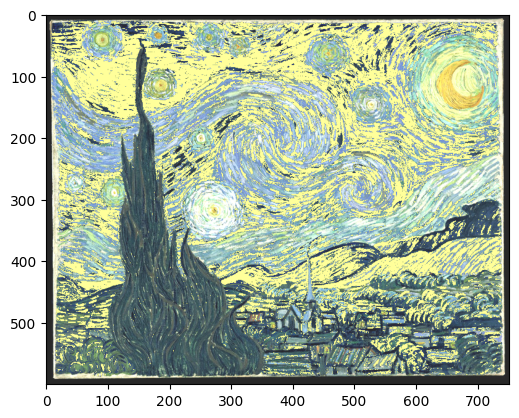

In [93]:
plt.imshow(change_to_day("starry_night.jpg"))